In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using MLJBase: machine, transform
using Imbalance

include("./utils.jl")

Imbalance.Imbalance.SMOTEImbalance.Imbalance.ROSEImbalance.Imbalance.RandomOversampler

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 50
num_features = 4
probs = [0.5, 0.2, 0.3]

extra_cat_feats = [3, 4, 2, 5]

X, y = generate_imbalanced_data(num_rows, num_features; type="Matrix", extra_cat_feats, probs=probs, rng=rng)

([0.6877098291068113 0.3228480133881416 … 1.0 5.0; 0.4246830140691855 0.8470330149595218 … 2.0 5.0; … ; 0.6617726455233052 0.9489037215033175 … 1.0 4.0; 0.799132786680001 0.08081816116268215 … 2.0 1.0], CategoricalValue{Int64, UInt32}[2, 0, 0, 0, 0, 1, 1, 0, 0, 2  …  0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

### 2. Apply SMOTENC

In [3]:
Xover, yover = smotenc(X, y, 5; k = 5, rng = 1234)

([0.6877098291068113 0.3228480133881416 … 1.0 5.0; 0.4246830140691855 0.8470330149595218 … 2.0 5.0; … ; 0.8818180427769695 0.6479554450240588 … 2.0 2.0; 0.21158572559877983 0.7327781927108263 … 2.0 1.0], CategoricalValue{Int64, UInt32}[2, 0, 0, 0, 0, 1, 1, 0, 0, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3. Plot the Results

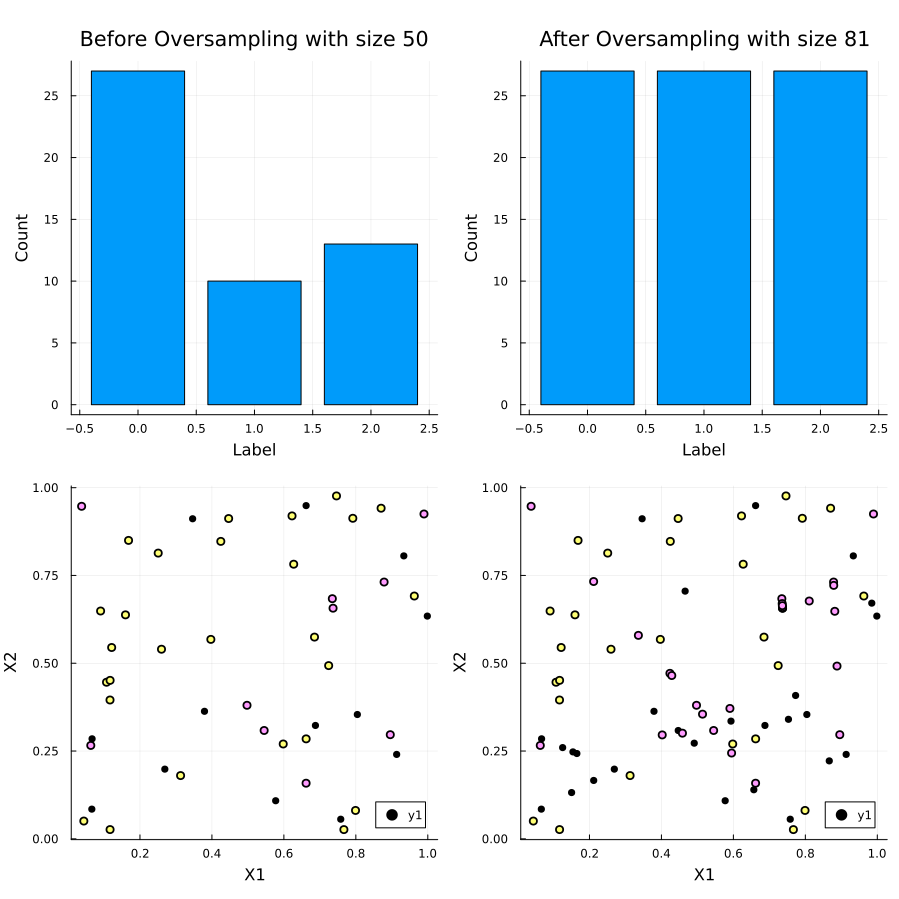

In [4]:
plot_data(y, yover, X, Xover)

#### Extra for the docs

In [44]:
using MLJBase
using Imbalance
using MLUtils
using Random
using StableRNGs: StableRNG

X, y = MLJBase.@load_iris
# Take an imbalanced subset of the data
rand_inds = rand(StableRNG(10), 1:150, 30)
X, y = getobs(X, rand_inds), y[rand_inds]
group_counts(y)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 3 entries:
  "virginica"  => 5
  "versicolor" => 15
  "setosa"     => 10

In [45]:
S = SMOTE(k=10, ratios=Dict("setosa"=>0.9, "versicolor"=> 1.0, "virginica"=>0.7), rng=42)
mach = machine(S)
Xover, yover = transform(mach, X, y)
group_counts(yover)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 3 entries:
  "virginica"  => 10
  "versicolor" => 15
  "setosa"     => 14